<a href="https://colab.research.google.com/github/Nicos64/Proyecto-Big-Data/blob/main/Proyecto_Banco_de_Alimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Banco de Alimentos**
##**Nicolás Ramírez Rivera**
##**Brayan Nicolás Castillo Gómez**

In [ ]:
# Cargamos las librerias que vamos a usar

import numpy as np      # Para usar funciones matemáticas
import pandas as pd     # Para manipular data
import pylab as pl      # Para realizar gráficas
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.pyplot as plt

import nltk             # Para realizar análisis de texto
from nltk.corpus import stopwords
nltk.download('stopwords')

lista_stopwords = set(stopwords.words('spanish')) # Generar el conjunto de palabras
lista_stopwords.update(['','',''])                # Actualizar el conjunto de palabras
#lista_stopwords                                   # Imprime las palabras

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Base de Datos

In [ ]:
# Leo mis datos
# Reemplaza con la ruta de tu archivo XLSX
ruta_archivo = '/content/drive/MyDrive/Big Data/Base de Datos Banco de Alimentos.xlsx'

# Lee el archivo XLSX y almacena los datos en un DataFrame de Pandas
data = pd.read_excel(ruta_archivo)

# Muestra las primeras filas del DataFrame para verificar que se haya cargado correctamente
#print(data.head())

In [ ]:
# Solicito información general de la base de datos
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 2 to 709
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   NIT                    92 non-null     int64 
 1   DV                     92 non-null     object
 2   ORGANIZACIÓN           92 non-null     object
 3   GRUPO POBLACIONAL      92 non-null     object
 4   RED TERRITORIAL        92 non-null     object
 5   LOCALIDAD              92 non-null     object
 6   BARRIO                 92 non-null     object
 7   DIRECCIÓN              92 non-null     object
 8   CONTACTO               92 non-null     object
 9   TELÉFONOS DE CONTACTO  92 non-null     object
 10  CORREO                 92 non-null     object
 11  DIA DE PEDIDO          92 non-null     object
 12  FRECUENCIA             92 non-null     object
 13  SEMANA                 92 non-null     object
dtypes: int64(1), object(13)
memory usage: 10.8+ KB


## Columnas Irrelevantes

In [ ]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['NIT', 'DV', 'ORGANIZACIÓN', 'DIRECCIÓN', 'CONTACTO', 'TELÉFONOS DE CONTACTO', 'CORREO']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna NIT: 37 subniveles
Columna DV: 26 subniveles
Columna ORGANIZACIÓN: 82 subniveles
Columna DIRECCIÓN: 83 subniveles
Columna CONTACTO: 57 subniveles
Columna TELÉFONOS DE CONTACTO: 57 subniveles
Columna CORREO: 43 subniveles


## Limpieza de Datos

In [ ]:
cols_cat = ['GRUPO POBLACIONAL', 'RED TERRITORIAL', 'LOCALIDAD', 'BARRIO', 'DIA DE PEDIDO', 'FRECUENCIA', 'SEMANA']

for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data[column] = data[column].str.lower()

### GRUPO POBLACIONAL

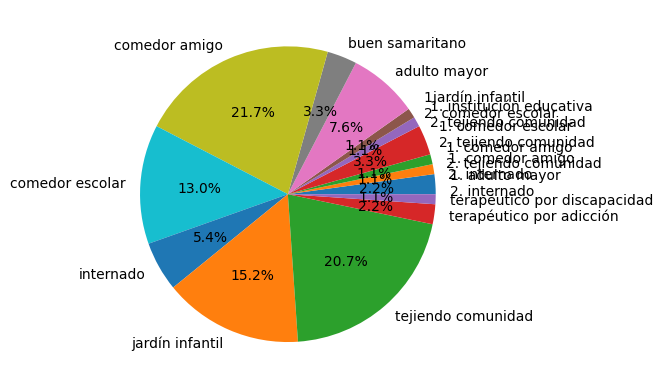

In [ ]:
# Realizo un gráfico de torta
imc_group, counts = np.unique(data['GRUPO POBLACIONAL'], return_counts=True)
_ = pl.pie(counts, labels=imc_group, autopct='%.1f%%')

In [ ]:
# Unificar Conceptos
#print(data['GRUPO POBLACIONAL'].unique())
data['GRUPO POBLACIONAL'] = data['GRUPO POBLACIONAL'].str.replace('1jardín infantil\n2. comedor escolar','jardín infantil', regex=False)
data['GRUPO POBLACIONAL'] = data['GRUPO POBLACIONAL'].str.replace('1. adulto mayor\n2. internado','internado', regex=False)
data['GRUPO POBLACIONAL'] = data['GRUPO POBLACIONAL'].str.replace('1. comedor escolar\n2. tejiendo comunidad','comedor escolar', regex=False)
data['GRUPO POBLACIONAL'] = data['GRUPO POBLACIONAL'].str.replace('1. institución educativa\n2. tejiendo comunidad','comedor escolar', regex=False)
data['GRUPO POBLACIONAL'] = data['GRUPO POBLACIONAL'].str.replace('1. comedor amigo\n2. internado','comedor amigo', regex=False)
data['GRUPO POBLACIONAL'] = data['GRUPO POBLACIONAL'].str.replace('1. comedor amigo\n2. tejiendo comunidad','tejiendo comunidad', regex=False)
#print(data['GRUPO POBLACIONAL'].unique())

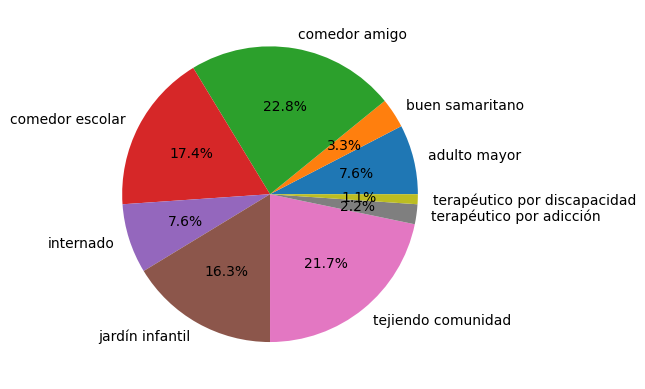

In [ ]:
# Realizo un gráfico de torta
imc_group, counts = np.unique(data['GRUPO POBLACIONAL'], return_counts=True)
_ = pl.pie(counts, labels=imc_group, autopct='%.1f%%')

### RED TERRITORIAL

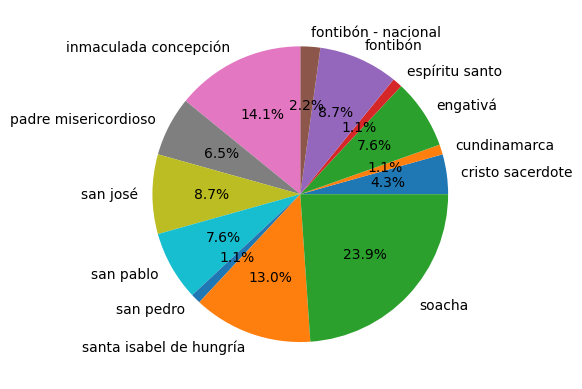

In [ ]:
# Realizo un gráfico de torta
imc_group, counts = np.unique(data['RED TERRITORIAL'], return_counts=True)
_ = pl.pie(counts, labels=imc_group, autopct='%.1f%%')

In [ ]:
# Unificar Conceptos
#print(data['RED TERRITORIAL'].unique())
data['RED TERRITORIAL'] = data['RED TERRITORIAL'].str.replace('fontibón - nacional','fontibón', regex=False)
#print(data['RED TERRITORIAL'].unique())

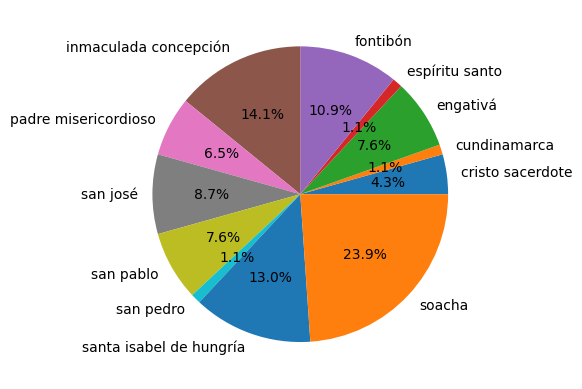

In [ ]:
# Realizo un gráfico de torta
imc_group, counts = np.unique(data['RED TERRITORIAL'], return_counts=True)
_ = pl.pie(counts, labels=imc_group, autopct='%.1f%%')

### LOCALIDAD

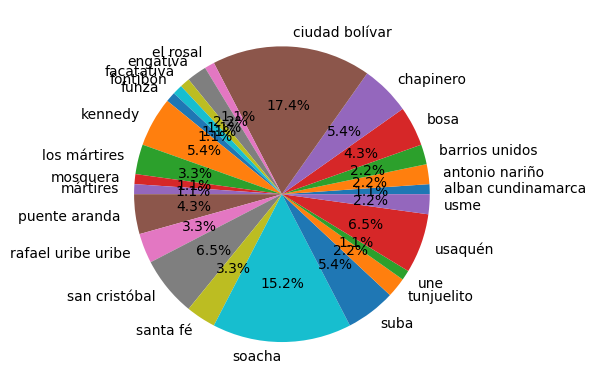

In [ ]:
# Realizo un gráfico de torta
imc_group, counts = np.unique(data['LOCALIDAD'], return_counts=True)
_ = pl.pie(counts, labels=imc_group, autopct='%.1f%%')

In [ ]:
# Unificar Conceptos
#print(data['LOCALIDAD'].unique())
data['LOCALIDAD'] = data['LOCALIDAD'].str.replace('los los los mártires','los mártires', regex=False)
data['LOCALIDAD'] = data['LOCALIDAD'].str.replace('los los mártires','los mártires', regex=False)
#print(data['LOCALIDAD'].unique())

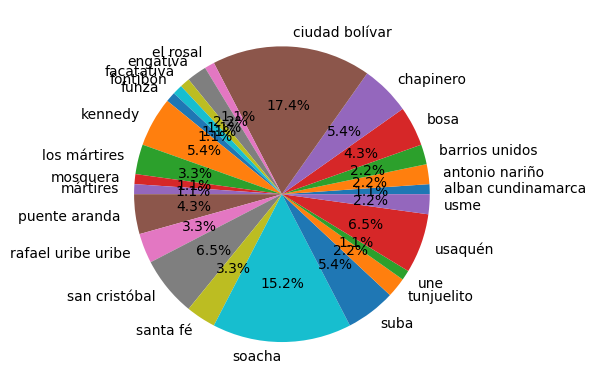

In [ ]:
# Realizo un gráfico de torta
imc_group, counts = np.unique(data['LOCALIDAD'], return_counts=True)
_ = pl.pie(counts, labels=imc_group, autopct='%.1f%%')

### BARRIO

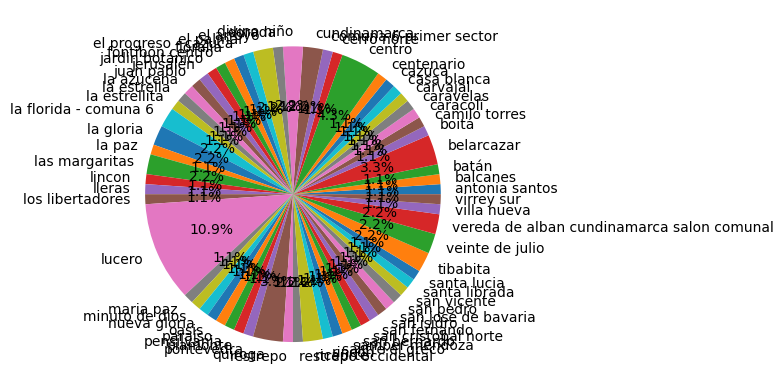

In [ ]:
# Realizo un gráfico de torta
imc_group, counts = np.unique(data['BARRIO'], return_counts=True)
_ = pl.pie(counts, labels=imc_group, autopct='%.1f%%')

In [ ]:
# Unificar Conceptos
#print(data['BARRIO'].unique())
data['BARRIO'] = data['BARRIO'].str.replace('la estrellita','la estrella', regex=False)
data['BARRIO'] = data['BARRIO'].str.replace('comuna 6 primer sector','la florida - comuna 6', regex=False)
data['BARRIO'] = data['BARRIO'].str.replace('el progreso - cazuca','cazuca', regex=False)
data['BARRIO'] = data['BARRIO'].str.replace('vereda de alban cundinamarca salon comunal','cundinamarca', regex=False)
data['BARRIO'] = data['BARRIO'].str.replace('la florida - comuna 6','la florida', regex=False)
#print(data['BARRIO'].unique())

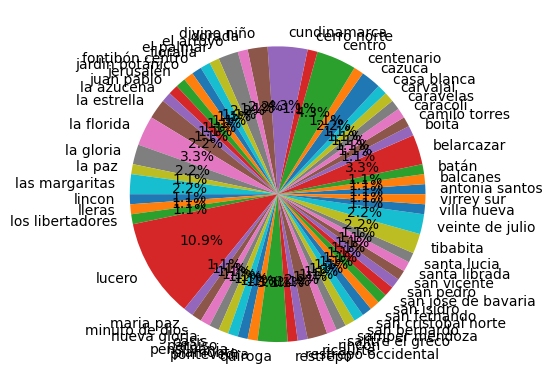

In [ ]:
# Realizo un gráfico de torta
imc_group, counts = np.unique(data['BARRIO'], return_counts=True)
_ = pl.pie(counts, labels=imc_group, autopct='%.1f%%')

### DIA DE PEDIDO

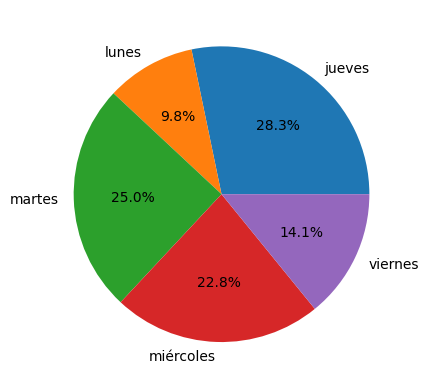

In [ ]:
# Realizo un gráfico de torta
imc_group, counts = np.unique(data['DIA DE PEDIDO'], return_counts=True)
_ = pl.pie(counts, labels=imc_group, autopct='%.1f%%')

### FRECUENCIA

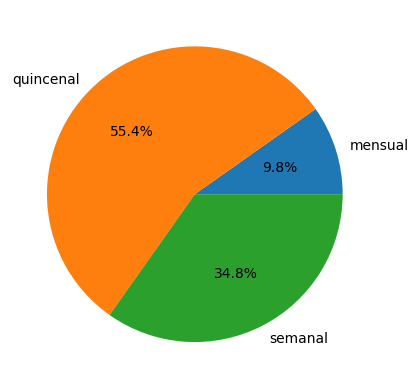

In [ ]:
# Realizo un gráfico de torta
imc_group, counts = np.unique(data['FRECUENCIA'], return_counts=True)
_ = pl.pie(counts, labels=imc_group, autopct='%.1f%%')

### SEMANA

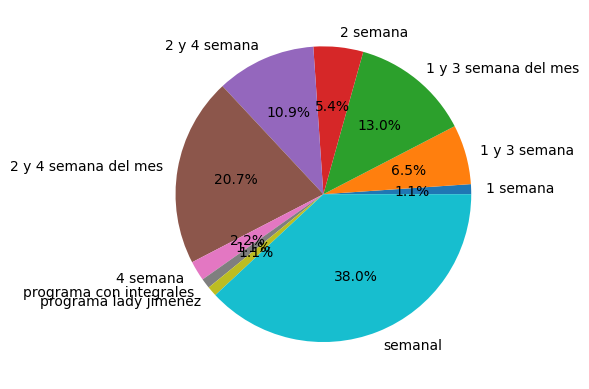

In [ ]:
# Realizo un gráfico de torta
imc_group, counts = np.unique(data['SEMANA'], return_counts=True)
_ = pl.pie(counts, labels=imc_group, autopct='%.1f%%')

In [ ]:
# Unificar Conceptos
print(data['SEMANA'].unique())
data['SEMANA'] = data['SEMANA'].str.replace('programa lady jimenez','1 semana', regex=False)
data['SEMANA'] = data['SEMANA'].str.replace('programa con integrales','1 semana', regex=False)
data['SEMANA'] = data['SEMANA'].str.replace('1 y 3 semana del mes','1 y 3 semana', regex=False)
data['SEMANA'] = data['SEMANA'].str.replace('2 y 4 semana del mes','2 y 4 semana', regex=False)
print(data['SEMANA'].unique())

['semanal' '4 semana' '2 semana' '1 y 3 semana' '2 y 4 semana'
 '2 y 4 semana del mes' '1 y 3 semana del mes' '1 semana'
 'programa lady jimenez' 'programa con integrales']
['semanal' '4 semana' '2 semana' '1 y 3 semana' '2 y 4 semana' '1 semana']


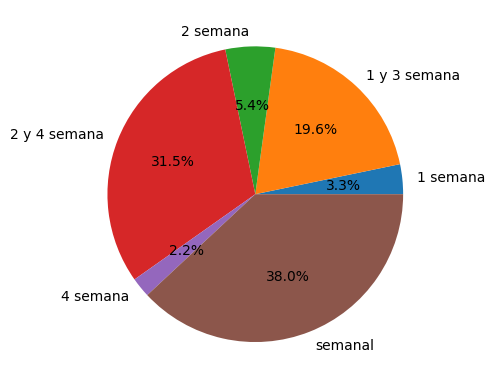

In [ ]:
# Realizo un gráfico de torta
imc_group, counts = np.unique(data['SEMANA'], return_counts=True)
_ = pl.pie(counts, labels=imc_group, autopct='%.1f%%')